<a href="https://colab.research.google.com/github/WerWin09/Bioinformatyka/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib pandas

   n   k  %poz  %neg    ŚrLev   StdLev
----------------------------------------
  30   3   0.0   0.0     2.20     0.60
  30   3   0.0   5.0     2.50     0.50
  30   3   0.0  10.0     3.90     0.94
  30   3   5.0   0.0     2.80     0.98
  30   3   5.0   5.0     4.40     1.20
  30   3   5.0  10.0     5.00     2.00
  30   3  10.0   0.0     4.80     1.60
  30   3  10.0   5.0     6.10     2.12
  30   3  10.0  10.0     5.30     1.68
  30   5   0.0   0.0     4.00     0.00
  30   5   0.0   5.0     5.10     0.83
  30   5   0.0  10.0     6.20     1.17
  30   5   5.0   0.0     4.80     0.75
  30   5   5.0   5.0     6.40     0.92
  30   5   5.0  10.0     6.70     1.42
  30   5  10.0   0.0     5.90     0.94
  30   5  10.0   5.0     6.50     1.36
  30   5  10.0  10.0     7.50     1.57
  50   3   0.0   0.0     2.00     0.00
  50   3   0.0   5.0     3.70     1.00
  50   3   0.0  10.0     6.20     1.99
  50   3   5.0   0.0     4.60     1.56
  50   3   5.0   5.0     5.20     1.40
  50   3   5.0  10.0   

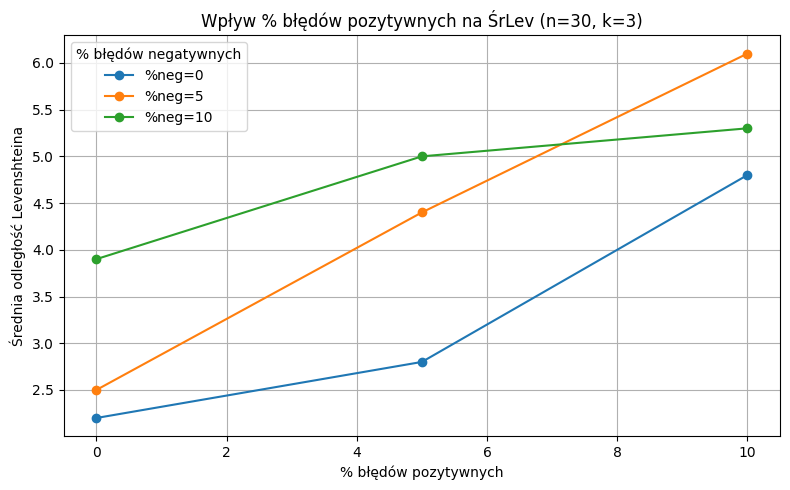

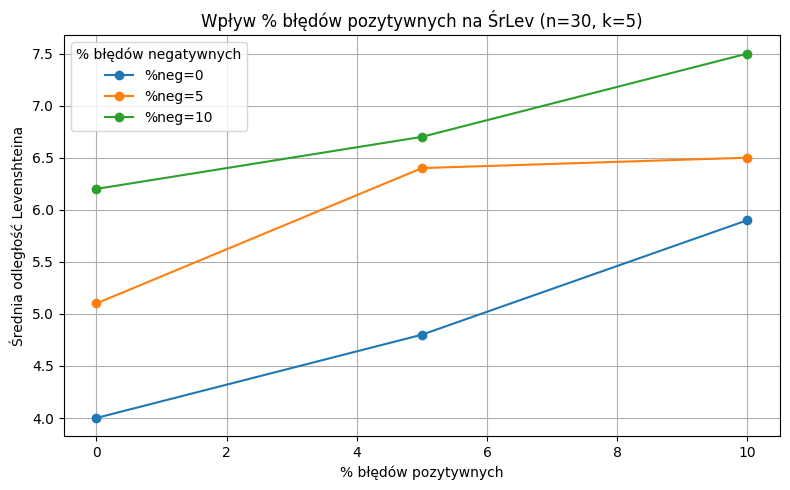

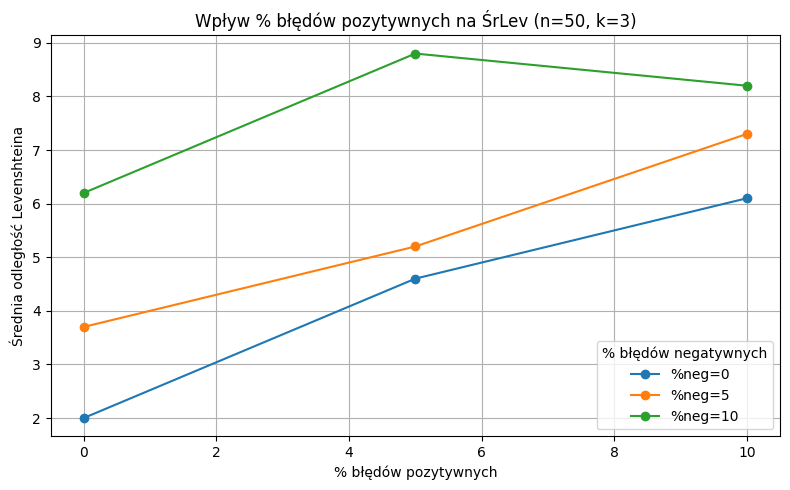

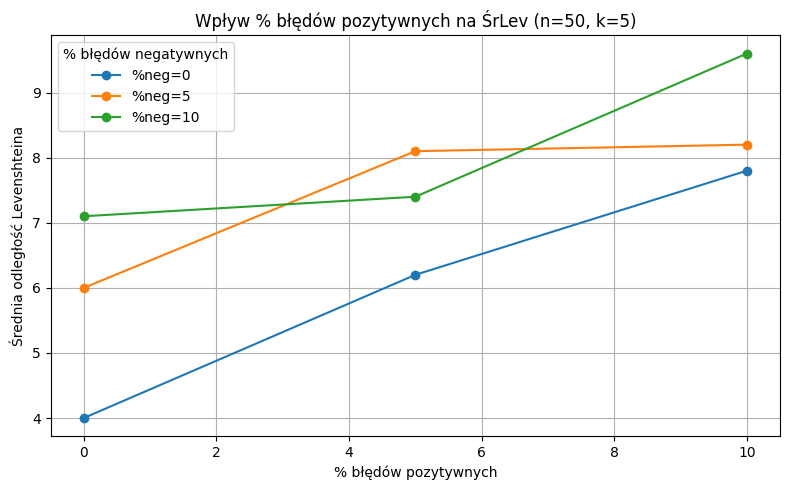

In [ ]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Levenshtein distance
def levenshtein_distance(s1, s2):
    m = len(s1)
    n = len(s2)
    dp = [[0]*(n+1) for _ in range(m+1)]
    for i in range(m+1):
        for j in range(n+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    return dp[m][n]

# Generate DNA sequence of length n
def generate_dna(n):
    bases = "ATCG"
    dna = ''.join(random.choice(bases) for _ in range(n))
    return dna

# Split DNA into fragments of length k
def cut_dna(dna, k):
    return [dna[i:i+k] for i in range(len(dna)-k+1)]

# Add positive and negative errors
def add_errors(dna, p_positive, p_negative):
    # Positive errors
    i = 0
    while i < len(dna):
        if random.random() < p_positive:
            dna = dna[:i] + random.choice("ATCG") + dna[i:]
            i += 1  # Move past inserted base
        i += 1
    # Negative errors
    i = len(dna) - 1
    while i >= 0:
        if random.random() < p_negative:
            dna = dna[:i] + dna[i+1:]
        i -= 1
    return dna

# Find path in graph (DFS-like)
def find_path(graph, path, visited, current):
    for i in range(len(graph)):
        if graph[current][i] > 0 and visited[i] == 0:
            visited[i] = 1
            find_path(graph, path, visited, i)
            path.append(i)

def single_test(n, k, p_positive, p_negative):
    original_dna = generate_dna(n)
    fragments = cut_dna(original_dna, k)
    fragments_with_errors = [add_errors(f, p_positive, p_negative) for f in fragments]

    # Build graph
    graph = [[0 for _ in fragments_with_errors] for _ in fragments_with_errors]
    for i in range(len(fragments_with_errors)):
        for j in range(len(fragments_with_errors)):
            if i != j:
                common_prefix = 0
                while (common_prefix < k and
                       len(fragments_with_errors[i]) > common_prefix and
                       len(fragments_with_errors[j]) > common_prefix and
                       fragments_with_errors[i][common_prefix] == fragments_with_errors[j][common_prefix]):
                    common_prefix += 1
                graph[i][j] = k - common_prefix

    # DFS path
    path = []
    visited = [0] * len(fragments_with_errors)
    visited[0] = 1
    find_path(graph, path, visited, 0)
    path.append(0)  # close loop

    # Reconstruct DNA
    reconstructed_dna = ''.join([fragments_with_errors[i][0] if fragments_with_errors[i] else 'N' for i in reversed(path)])
    # Levenshtein distance
    lev = levenshtein_distance(reconstructed_dna, original_dna)
    return lev

def main():
    random.seed(int(time.time()))
    # Parametry testów
    n_values = [30, 50]       # długości DNA
    k_values = [3, 5]         # długości fragmentów
    p_pos_values = [0.0, 0.05, 0.1]    # błędy pozytywne
    p_neg_values = [0.0, 0.05, 0.1]    # błędy negatywne
    tests_per_config = 10     # liczba powtórzeń dla każdego zestawu parametrów

    results = []
    # Nagłówek tabeli
    print(f"{'n':>4} {'k':>3} {'%poz':>5} {'%neg':>5} {'ŚrLev':>8} {'StdLev':>8}")
    print("-"*40)

    for n in n_values:
        for k in k_values:
            for p_pos in p_pos_values:
                for p_neg in p_neg_values:
                    lev_results = []
                    for _ in range(tests_per_config):
                        lev = single_test(n, k, p_pos, p_neg)
                        lev_results.append(lev)
                    avg_lev = np.mean(lev_results)
                    std_lev = np.std(lev_results)
                    results.append((n, k, p_pos, p_neg, avg_lev, std_lev))
                    # Wypisz wiersz tabeli
                    print(f"{n:>4} {k:>3} {p_pos*100:5.1f} {p_neg*100:5.1f} {avg_lev:8.2f} {std_lev:8.2f}")

    # ------- Tworzenie wykresu ---------
    # Przykładowy wykres: wpływ błędów pozytywnych na ŚrLev (przy stałym n, k i p_neg)
    for n in n_values:
        for k in k_values:
            plt.figure(figsize=(8, 5))
            for p_neg in p_neg_values:
                x = []
                y = []
                for p_pos in p_pos_values:
                    for row in results:
                        if row[0] == n and row[1] == k and row[3] == p_neg and row[2] == p_pos:
                            x.append(p_pos*100)
                            y.append(row[4])
                plt.plot(x, y, marker='o', label=f'%neg={int(p_neg*100)}')
            plt.title(f'Wpływ % błędów pozytywnych na ŚrLev (n={n}, k={k})')
            plt.xlabel('% błędów pozytywnych')
            plt.ylabel('Średnia odległość Levenshteina')
            plt.legend(title='% błędów negatywnych')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

if __name__ == "__main__":
    main()
